<font size = 5> $X_{n+1} = a \cdot X_{n}\cdot(1-X_{n})$

$X_{n}$: Theoretical poblational percentage at time n

a: growth rate, $0\leq a \leq 4$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#This code let us to save the values of the population inside to an array named values_population

def logistic(total_years,initial_population,a): #We define a function named as logistic
  values_population = np.zeros(total_years)
  values_population[0] = initial_population  #here we save the initial population value for the next iterations
  population = initial_population
    
  for i in range(1,len(values_population)):
     population = a*population*(1-population)
     values_population[i] = population
  return values_population

In [8]:
#For example if we choose total_years = 30, initial_population = 0.30 and a = 2.8 we have:

list_logistic = logistic(30,0.30,2.8)

#So the total_years correspond to a number of iterations in x_{n+1}

print(list_logistic,"length:",len(list_logistic))

#We can see that the values of populations are stable around to np.mean(list_logistic) (0.6300590895659196)

[0.3        0.588      0.6783168  0.61096873 0.66552063 0.62328818
 0.65744007 0.63059535 0.6522456  0.63509958 0.64889469 0.63792504
 0.64673471 0.63971299 0.64534479 0.6408497  0.64445181 0.64157429
 0.64387882 0.64203688 0.64351147 0.64233248 0.6432761  0.64252148
 0.64312535 0.64264237 0.64302883 0.64271971 0.64296704 0.64276919] length: 30


In [26]:
#Furthermore, we want to take the last terms in the time series of the population values, for example, 
#the last hundred values (because I expect these numbers to show us the behavior of the population at time 100) 
#and consider every series of population values for each a \in [0,4]


def Logistic_function(a_min,a_max,partition,total_years,initial_population):
    list_a = np.linspace(a_min, a_max, partition)
    list_population = []
    list_rs = []

    for a in list_a:
        log = logistica(total_years, initial_population, a)
        list_last_100 = log[len(log)-100:]  # The last 100 values
        list_population.extend(list_last_100)
        
        for j in range(len(list_last_100)):
          list_rs.append(a)

    return np.array(list_rs), np.array(list_population)


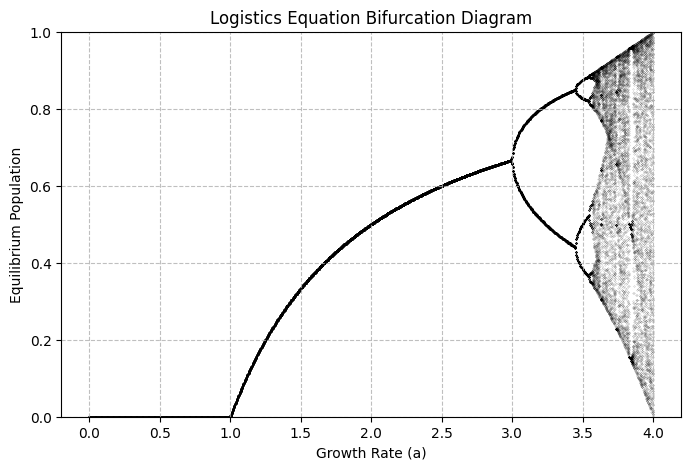

In [28]:
list_a, list_population = Logistic_function(0,4,1000,500,0.48)

#plot
plt.figure(figsize=(8, 5))
plt.scatter(list_a, list_population, s=0.1, c='black', alpha=0.5, marker='.')
plt.title('Logistics Equation Bifurcation Diagram')
plt.xlabel('Growth Rate (a)')
plt.ylabel('Equilibrium Population')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()